![title](UCN ICI.png)

 #  <font color= #007FFF> Sistema de Recomendación de Música </font>

<div class="alert alert-info"> </h4> **Material preparado para el Master en Ingeniería Civil Industrial | Universidad Católica del Norte | Antofasta | Curso - Predictive Analytics.**
</h4> </div>


Utilizando arboles de decisión crear un sistema de recomendación de música.

 ##  <font color= #007FFF> 1.- Importar & Explorar los Datos</font>

In [1]:
import pandas as pd

In [2]:
music_data=pd.read_csv('music.csv')
display(music_data.shape)
music_data.head()

(18, 3)

,age,gender,genre
0,20,1,HipHop
1,23,1,HipHop
2,25,1,HipHop
3,26,1,Jazz
4,29,1,Jazz


 ##  <font color= #007FFF> 2.- Modelo de Clasificación Simple </font>

In [3]:
from sklearn.tree import DecisionTreeClassifier

Y = music_data['genre']
X = music_data.drop(labels='genre',axis=1)

model=DecisionTreeClassifier()
model.fit(X,Y)
predictions=model.predict([[21,1],[22,0]])
predictions

array(['HipHop', 'Dance'], dtype=object)

In [4]:
predictions[0]

'HipHop'


#  <font color= #007FFF> 3.- Calculando la Exactitud  del Modelo</font>

In [5]:
# Regla de testing:
# 70-80% modeling
# 30-20% testing

from sklearn.model_selection import train_test_split

Y = music_data['genre']
X = music_data.drop(labels='genre',axis=1)

#Splitting for testing
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [6]:
display(X_train.head())
X_train.shape

,age,gender
1,23,1
4,29,1
8,37,1
17,35,0
12,26,0


(14, 2)

In [7]:
display(X_test)
X_test.shape

,age,gender
5,30,1
3,26,1
14,30,0
10,21,0


(4, 2)

In [8]:
display(Y_train.head())
Y_train.shape

1        HipHop
4          Jazz
8     Classical
17    Classical
12     Acoustic
Name: genre, dtype: object

(14,)

In [9]:
Y_test

5         Jazz
3         Jazz
14    Acoustic
10       Dance
Name: genre, dtype: object

In [10]:
#Model - train set
from sklearn.metrics import accuracy_score

model=DecisionTreeClassifier()
model.fit(X_train,Y_train)

predictions=model.predict(X_test)

score=accuracy_score(Y_test,predictions)
score

0.75


#  <font color= #007FFF> 4.- Guardando el Modelo </font>

In [11]:
from sklearn.externals import joblib

music_data=pd.read_csv('music.csv')

Y = music_data['genre']
X = music_data.drop(labels='genre',axis=1)


model=DecisionTreeClassifier()
model.fit(X,Y)

# Guardando el Modelo
joblib.dump(model,'Music_Recommeder.joblib')

['Music_Recommeder.joblib']

In [12]:
# Utilizando el Modelo Guardo
train_model=joblib.load('Music_Recommeder.joblib')
predictions=train_model.predict([[21,1]])
predictions

array(['HipHop'], dtype=object)

In [13]:
# Utilizando el modelo Guardado con varios inputs.
usuarios=[[21,1],[35,0],[28,1]]
train_model=joblib.load('Music_Recommeder.joblib')
predictions=train_model.predict(usuarios)
predictions

array(['HipHop', 'Classical', 'Jazz'], dtype=object)

#  <font color= #007FFF> 5.- Visulazation of a Decision Tree </font>

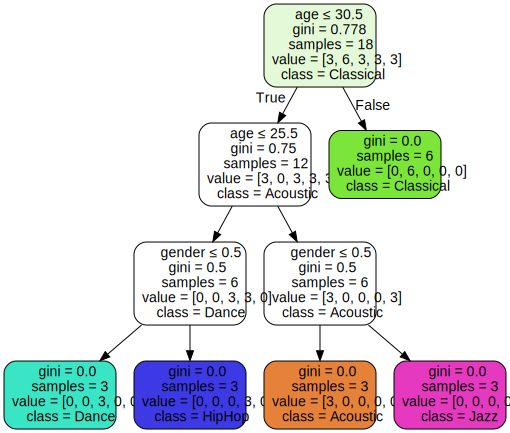

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz 

music_data=pd.read_csv('music.csv')

Y = music_data['genre']
X = music_data.drop(labels='genre',axis=1)

model=DecisionTreeClassifier() #max_depth=2
model=model.fit(X,Y)


dot_data = export_graphviz(model, out_file=None,
                    feature_names=['age','gender'],
                    class_names=sorted(Y.unique()),
                    label='all',
                filled=True, rounded=True,special_characters=True) 

graph = graphviz.Source(dot_data)  
graph

In [15]:
# Saving .dot file and read it.
import pandas as pd
from sklearn.tree import export_graphviz
import graphviz

music_data=pd.read_csv('music.csv')

Y = music_data['genre']
X = music_data.drop(labels='genre',axis=1)

model=DecisionTreeClassifier() #max_depth=2
model=model.fit(X,Y)

export_graphviz(model, out_file='music-recommender.dot',feature_names=['age','gender'],
                class_names=sorted(Y.unique()),label='all',
                filled=True, rounded=True,special_characters=True)

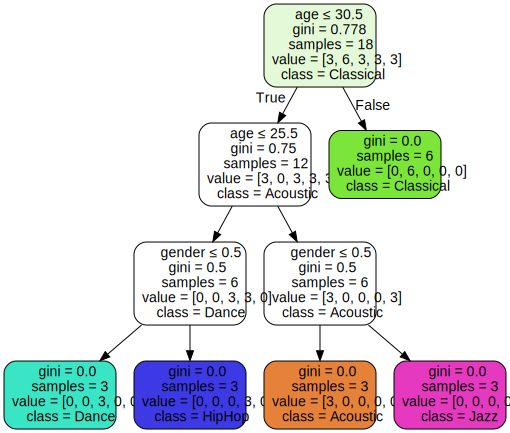

In [16]:
graph  = graphviz.Source.from_file('music-recommender.dot',format="png")
graph 

In [17]:
# Saving the file and 
from os import getcwd
from os import listdir

path=getcwd()
#files = listdir(path)
#files

path = 'music-recommender.dot'
s = graphviz.Source.from_file(path)
s.view()

'music-recommender.dot.pdf'

#  <font color= #007FFF> 6.- Visulazation of Decision Tree - Widgets </font>

In [18]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display                               
from ipywidgets import interactive


# load dataset
data =pd.read_csv('music.csv')

# feature matrix
X = data.drop(labels='genre',axis=1)
# target vector
y = data['genre']
# class labels
feature_names=['age','gender']

def plot_tree(criteria, split, depth, min_split, min_leaf=0.2):
    estimator = DecisionTreeClassifier(random_state = 0 
      , criterion = criteria
      , splitter = split
      , max_depth = depth
      , min_samples_split=min_split
      , min_samples_leaf=min_leaf)
    estimator.fit(X, y)
    graph = Source(tree.export_graphviz(estimator
      , out_file=None
      , feature_names=['age','gender']
      , class_names=sorted(y.unique())
      , filled = True))
   
    display(SVG(graph.pipe(format='svg')))
    return estimator

inter=interactive(plot_tree 
   , criteria = ["gini", "entropy"]
   , split = ["best", "random"]
   , depth=[1,2,3,4]
   , min_split=(0.1,1)
   , min_leaf=(0.1,0.5))

display(inter)

A Jupyter Widget